In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
Data = pd.read_csv('Data/Mobiles_Dataset.csv')

In [6]:
Data.shape

(984, 12)

In [7]:
#reseting index
Data.reset_index(inplace=True)

In [8]:
#Removing Actual Price column
Data = Data.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12]]

In [9]:
Data.reset_index(inplace=True)

In [10]:
Data.head(1)

,level_0,index,Product Name,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Link
0,0,0,"Apple iPhone 15 (Green, 128 GB)","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.1,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-green...


In [11]:
# renaming columns for easy nomenclature
Data=Data.copy()
Data.rename(columns={"index":"id",
                     "Product Name":"name",
                     "Discount price":"price",
                     "Stars":"stars",
                     "Reviews":"reviews",
                     "Rating":"rating",
                     "RAM (GB)":"RAM",
                     "Storage (GB)":"storage",
                    "Display Size (inch)":"display",
                    "Camera":"camera",
                    "Description":"desc",
                    "Link":"url"},inplace=True)

In [12]:
Data.head(1)

,level_0,id,name,price,stars,rating,reviews,RAM,storage,display,camera,desc,url
0,0,0,"Apple iPhone 15 (Green, 128 GB)","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.1,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-green...


In [13]:
# Modifying the product name and removing the whole bracket
Data['name'] = Data['name'].str.replace(r'\s*\(.*?\)', '', regex=True)

In [14]:
# Converting rating column into int
# Removing the word "Ratings" and commas, then convert to integer
Data['rating'] = Data['rating'].str.replace(' Ratings', '').str.replace(',', '').astype(int)

In [15]:
#Same with reviews
Data['reviews'] = Data['reviews'].str.replace(' Reviews', '').str.replace(',', '').astype(int)

In [16]:
#Same with price
Data['price'] = Data['price'].str.replace('₹', '').str.replace(',', '').str.strip()
Data['price'] = Data['price'].replace('', pd.NA)
Data.dropna(subset=['price'], inplace=True)
Data['price'] = Data['price'].astype(int)

In [17]:
Data.dtypes

level_0      int64
id           int64
name        object
price        int32
stars      float64
rating       int32
reviews      int32
RAM         object
storage     object
display    float64
camera      object
desc        object
url         object
dtype: object

In [18]:
Data.shape

(980, 13)

In [19]:
Data=Data.drop_duplicates(['name'])

In [20]:
Data.head(1)

,level_0,id,name,price,stars,rating,reviews,RAM,storage,display,camera,desc,url
0,0,0,Apple iPhone 15,65999,4.6,44793,2402,NIL,128,6.1,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-green...


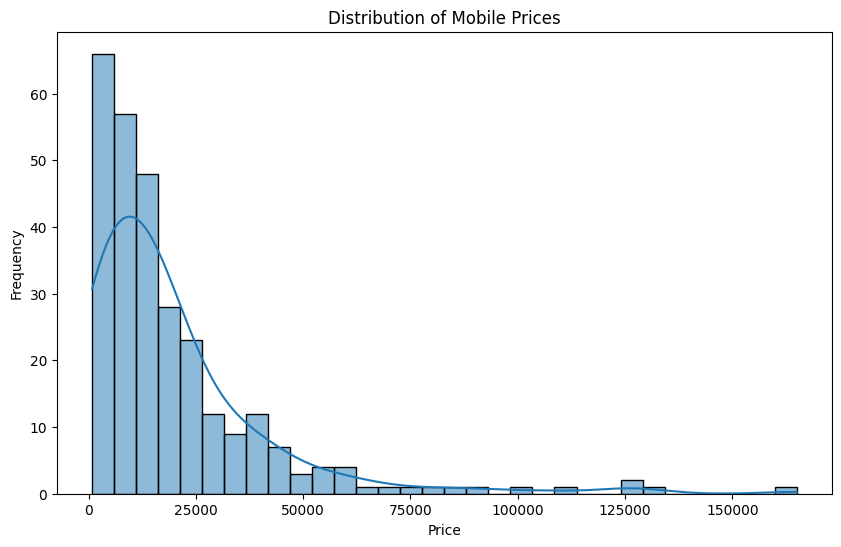

In [21]:
#Price spread across the dataset
plt.figure(figsize=(10, 6))
sns.histplot(Data['price'], kde=True)
plt.title('Distribution of Mobile Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

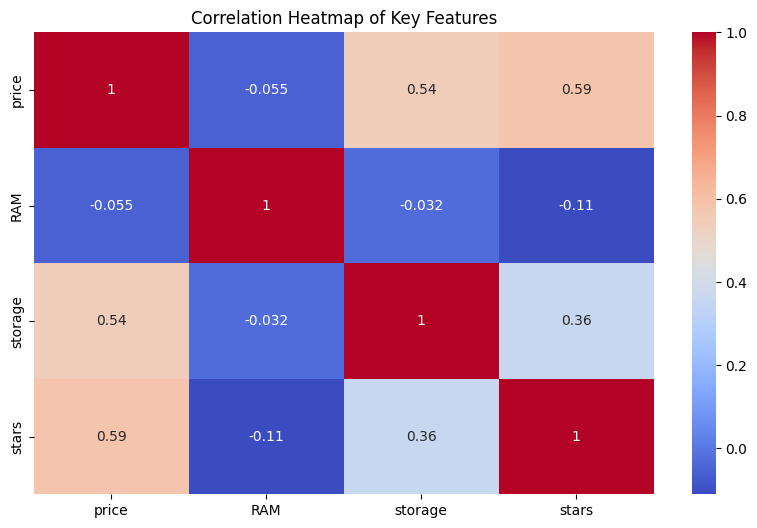

In [22]:
# correlations between numeric features like price, RAM, and storage
Data[['price', 'RAM', 'storage', 'stars']] = Data[['price', 'RAM', 'storage', 'stars']].replace('NIL', np.nan)
plt.figure(figsize=(10, 6))
sns.heatmap(Data[['price', 'RAM', 'storage', 'stars']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Features')
plt.show()

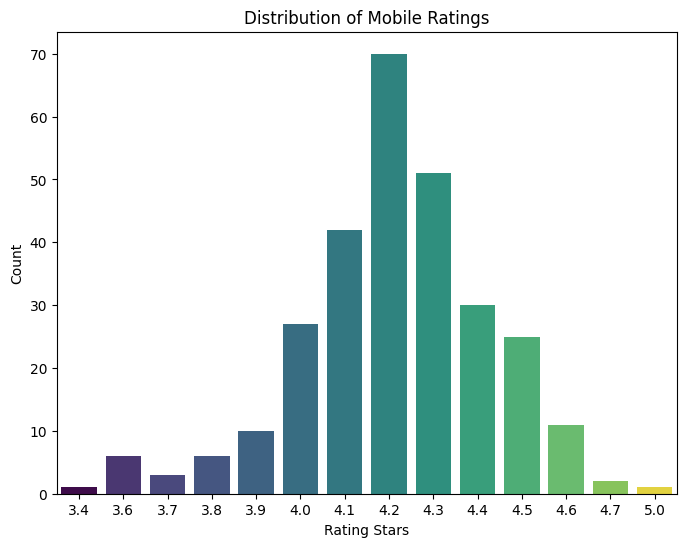

In [23]:
#Distribution of mobile ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='stars', data=Data, hue='stars', palette='viridis', legend=False)
plt.title('Distribution of Mobile Ratings')
plt.xlabel('Rating Stars')
plt.ylabel('Count')
plt.show()

In [24]:
# Removing Products which has ratings and reviews less than 50 and 10
mask1=Data['rating']>=50
mask2=Data['reviews']>=10
Data = Data[mask1 & mask2]

In [25]:
Data.shape

(245, 13)

In [26]:
# 1st Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pickle
import joblib

X = Data[['RAM', 'storage', 'display']]
y = Data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
joblib.dump(model, 'random_forest_model.pkl')

RandomForestRegressor(random_state=42)

In [55]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [31]:
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

threshold = y_test.mean()  
y_test_binary = (y_test >= threshold).astype(int)
y_pred_binary = (y_pred >= threshold).astype(int)

# Precision, Recall, and F1-Score
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Mean Absolute Error: 3991.2556576957245
Root Mean Square Error: 7428.554525872366
R2 Score: 0.868904732151963
Precision: 0.7368421052631579
Recall: 0.875
F1-Score: 0.8


In [35]:
# 2nd Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
Data['features'] = (
    Data['camera'] + ' ' +
    Data['price'].astype(str) + ' ' +
    Data['stars'].astype(str) + ' ' +
    Data['rating'].astype(str) + ' ' +
    Data['RAM'].astype(str) + ' ' +
    Data['storage'].astype(str)
)

In [27]:
Data['features'].fillna('unknown', inplace=True)
Data['features'] = Data['features'].astype(str)

C:\Users\advit\AppData\Local\Temp\ipykernel_38388\970841541.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['features'].fillna('unknown', inplace=True)


In [28]:
# Use TfidfVectorizer to create a matrix of features
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(Data['features'])

In [29]:
# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [30]:
# Save the model and dataset
with open('mobile_recommender_model.pkl', 'wb') as model_file:
    pickle.dump(cosine_sim, model_file)

Data.to_csv('mobiles_dataset.csv', index=False)